-----FAILED: c:/users/salch/pancreasCNN/data/filtered/train/ Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/filtered/train/ Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/filtered/test/ Already exists
-----FAILED: c:/users/salch/pancreasCNN/data/filtered/test/ Already exists


The top image is the original state of Image 156. The bottom image is the resulting image after the median filter is applied: 


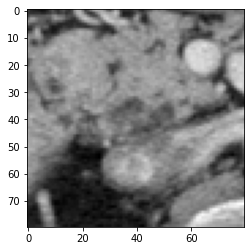

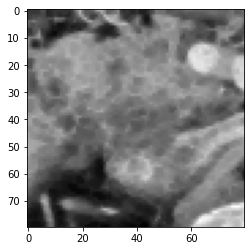

In [15]:

'''
Author: Sal Choueib
Student No. : 10188460
Class: CISC881
Description:

    This script will read in a list of numpy arrays from the output of the patch extraction and apply
    ndimage's median filtering function on each patch. This is done to remove speckle noise from the patches. 

'''


#!pip install simpleitk

import SimpleITK as sitk
import os
import pathlib as pathlib
import numpy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate
import scipy.ndimage as ndimage


def make_directory(path):
    try:
        os.mkdir(path)
        
    except FileExistsError:
        print("-----FAILED: "+path+ " Already exists")
    except OSError:
        print("Failed to create directory in: " +path)
    else:
        print("Directory created in: " +path)
        return None
    try:
        os.makedirs(path)
    except FileExistsError:
        print("-----FAILED: "+path+ " Already exists")
    except OSError:
        print("Failed to create directory in: " +path)
    else:
        print("Directory created in: " +path)
        return None

def filtering(ct_patches):
    #ct_patches = ((ct_patches - ct_patches.min()) / (ct_patches.max()-ct_patches.min())) * 255
    ct_patches = ndimage.median_filter(ct_patches,size=2) #apply median filter of kernel size 2x2
    return ct_patches

def save_patches_to_disk(ct_patches,ct_patch_labels,output_dir_ct_labels):
    np.save(output_dir_ct_labels+"ct_patches.npy",ct_patches)
    np.save(output_dir_ct_labels+"labels.npy",ct_patch_labels)
    return

#Initializations & paths
#Input Paths: 
ct_patch_input_train  = "c:/users/salch/pancreasCNN/data/patch_extraction/train/ct_patches.npy"
labels_input_train    = "c:/users/salch/pancreasCNN/data/patch_extraction/train/labels.npy"
ct_patch_input_test   = "c:/users/salch/pancreasCNN/data/patch_extraction/test/ct_patches.npy"
labels_input_test     = "c:/users/salch/pancreasCNN/data/patch_extraction/test/labels.npy"
#Output Paths: 
ct_patch_output_train = "c:/users/salch/pancreasCNN/data/filtered/train/"
ct_patch_output_test  = "c:/users/salch/pancreasCNN/data/filtered/test/"

#make directories for writing to disk
make_directory(ct_patch_output_train)
make_directory(ct_patch_output_test)

#load train and test data
labels_train = numpy.load(labels_input_train)
labels_test = numpy.load(labels_input_test)

ct_patches_train = numpy.load(ct_patch_input_train)
ct_patches_test = numpy.load(ct_patch_input_test)


#print for check 
plt.figure(1)
plt.imshow(ct_patches_train[:,:,156], cmap='gray')

#add median filter to the train and test data
ct_patches_train = filtering(ct_patches_train)
ct_patches_test = filtering(ct_patches_test)

plt.figure(2)
plt.imshow(ct_patches_train[:,:,156], cmap='gray')
print("\n\nThe top image is the original state of Image 156. The bottom image is the resulting image after the median filter is applied: ")

save_patches_to_disk(ct_patches_train,labels_train,ct_patch_output_train)
save_patches_to_disk(ct_patches_test,labels_test,ct_patch_output_test)



In [8]:
#check the dimensions of the train set
train = np.load("c:/users/salch/pancreasCNN/data/filtered/train/ct_patches.npy")
ltrain =np.load("c:/users/salch/pancreasCNN/data/filtered/train/labels.npy")
print(train.shape)
print(ltrain.shape)

(80, 80, 759)
(759, 1)


In [9]:
#check the dimensions of the test set
test = np.load("c:/users/salch/pancreasCNN/data/filtered/test/ct_patches.npy")
ltest =np.load("c:/users/salch/pancreasCNN/data/filtered/test/labels.npy")
print(test.shape)
print(ltest.shape)

(80, 80, 224)
(224, 1)
